In [20]:
import pandas as pd
import numpy as np
import talib as ta
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf
import datetime

## ドル円の終値

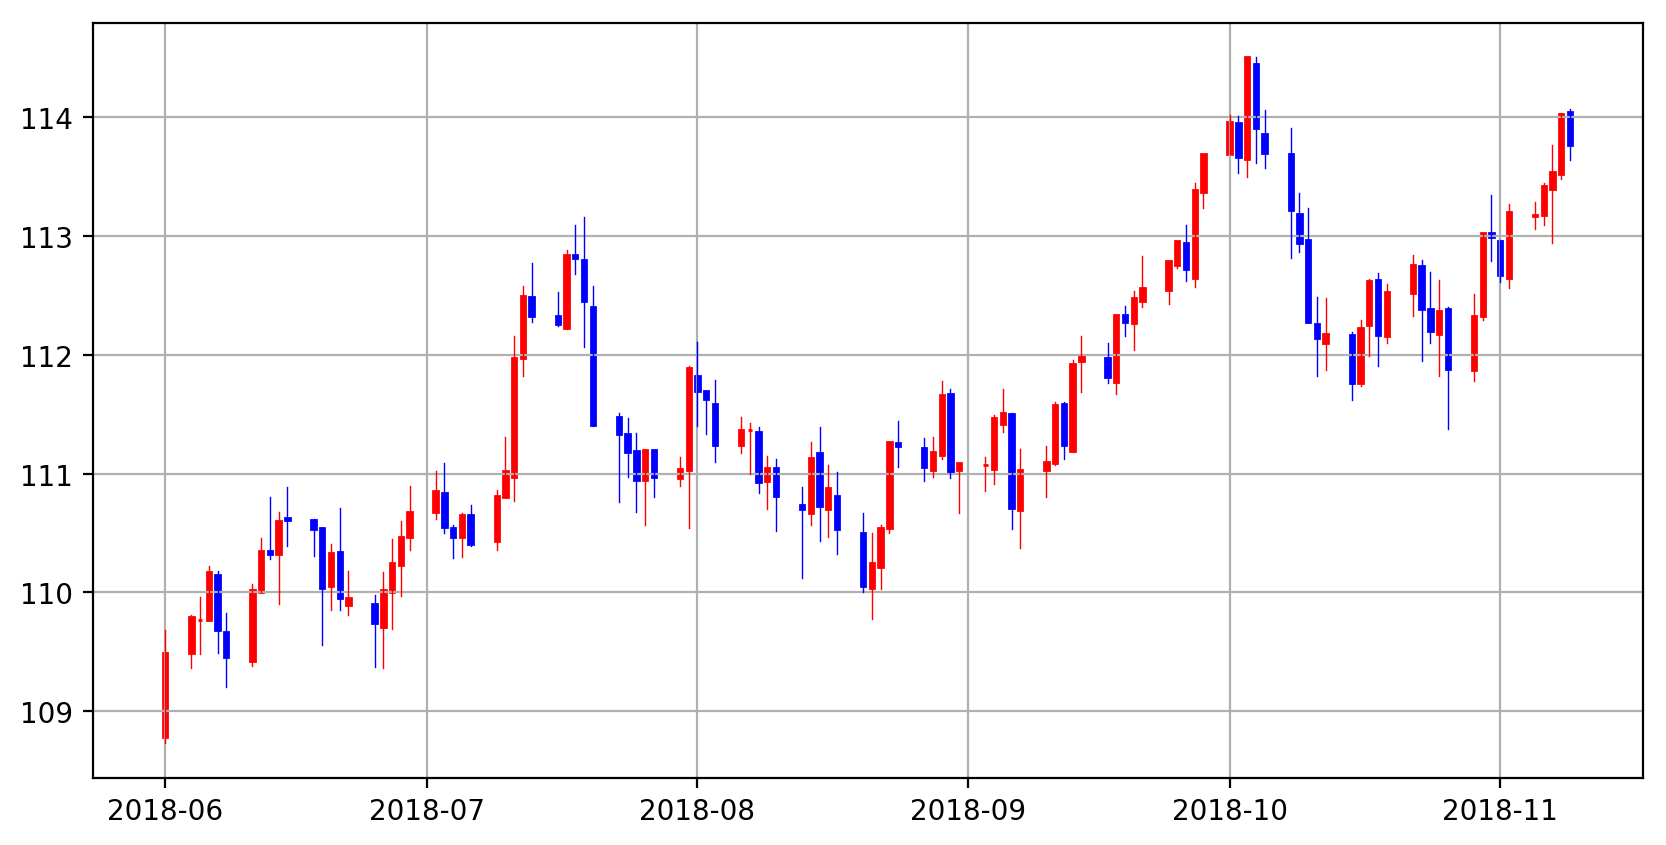

In [36]:
df = pd.read_csv('../csv_realtime/USD_JPY.csv', index_col='Date', parse_dates=True)
df = df['2018-6-1':]

_df = df.copy()
_df.index = mdates.date2num(_df.index)
USD_JPY = _df.reset_index().values
#print(USD_JPY)


fig = plt.figure(figsize=(10, 5), dpi=200)
ax = plt.subplot()

mpf.candlestick_ohlc(ax, USD_JPY, width=0.5, colorup='r', colordown='b')

locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

ax.grid()

## テクニカル指標作成

In [29]:
df_close = df['USD_JPY_Close']
sma5 = ta.SMA(df_close, timeperiod=5)
sma25 = ta.SMA(df_close, timeperiod=25)
sma75 = ta.SMA(df_close, timeperiod=75)
upper1, middle, lower1 = ta.BBANDS(df_close, timeperiod=5, nbdevup=1, nbdevdn=1)
upper2, middle, lower2 = ta.BBANDS(df_close, timeperiod=5, nbdevup=2, nbdevdn=2)
upper3, middle, lower3 = ta.BBANDS(df_close, timeperiod=5, nbdevup=3, nbdevdn=3)


rsi14 = ta.RSI(df_close, timeperiod=14)
momentam = ta.MOM(df_close, timeperiod=5)
macd, macdsignal, macdhist = ta.MACD(df_close, fastperiod=12, slowperiod=26, signalperiod=9)


## 移動平均線

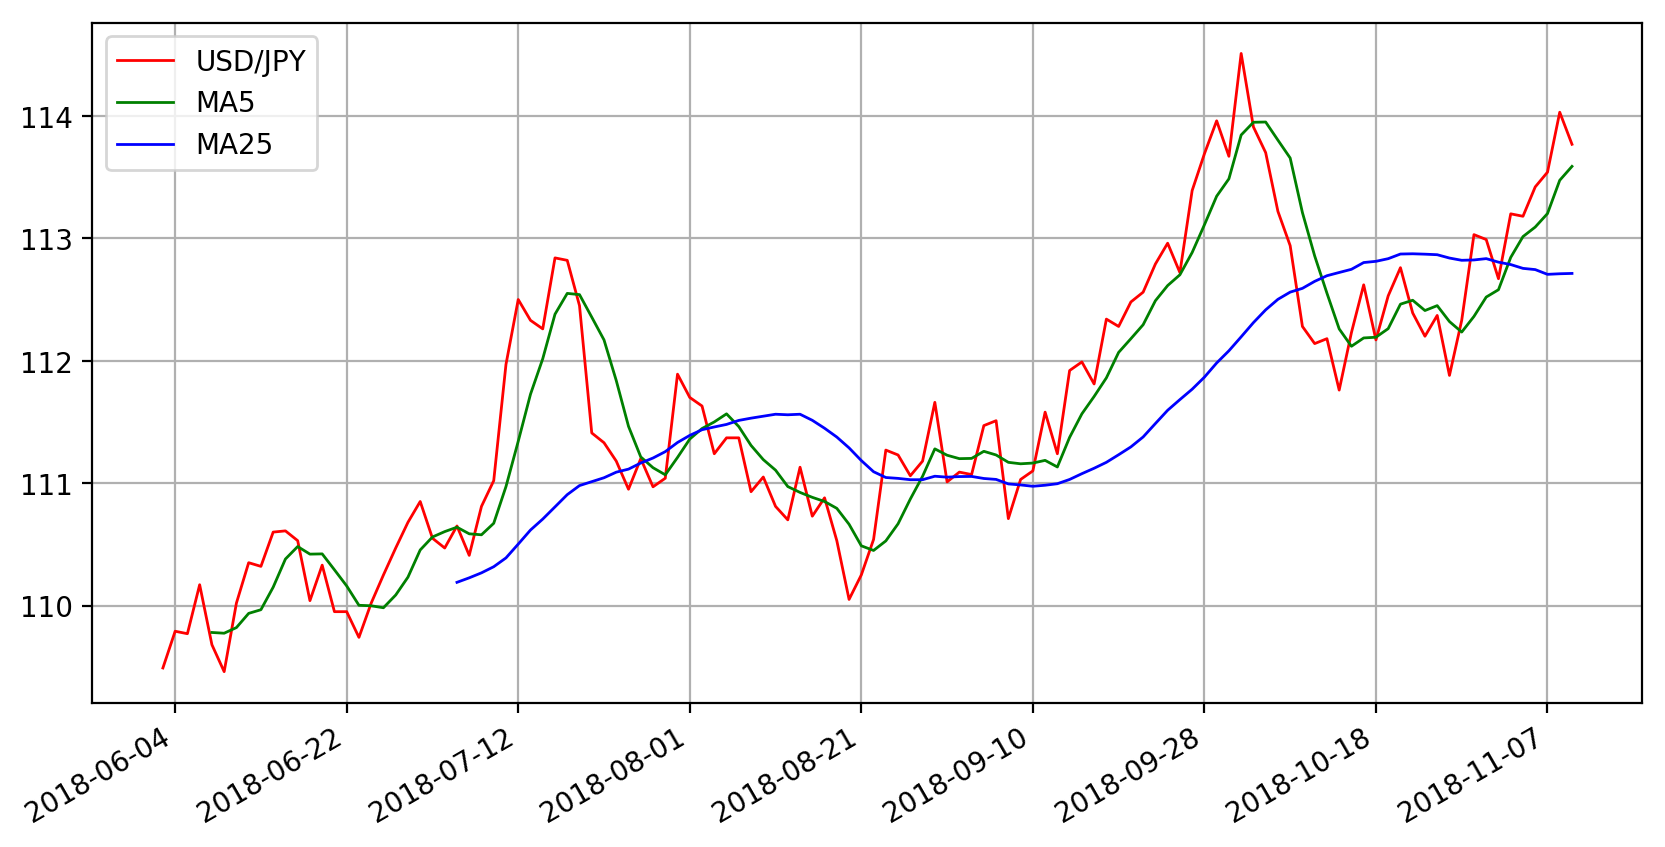

In [30]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = plt.subplot()

#終値を表示
ax.plot(range(len(df_close)), df_close, color='red', linewidth=1, label='USD/JPY')

# 5日単純移動平均
ax.plot(range(len(df_close)), sma5, color='green', linewidth=1, label='MA5')
# 25日単純移動平均
ax.plot(range(len(df_close)), sma25, color='blue', linewidth=1, label='MA25')
# 75日単純移動平均
#ax.plot(range(len(df_close)), sma75, color='red', linewidth=1, label='MA75')

xtick0 = (5 - df_close.index[0].weekday())%5 # 最初の日を特定
period = 14 #メモリの間隔
# 第１引数が目盛りの指定、第２引数がラベルの指定
plt.xticks(range(xtick0, len(df_close), period), [x.strftime('%Y-%m-%d') for x in df_close.index][xtick0::period])

ax.grid(True) # グリッドをつける
ax.legend() # ラベル名の表示
fig.autofmt_xdate() # 日付の表示がいい感じになる
#print(sma5)
#print(sma25)
#print(sma5 - sma25)

## ボリンジャーバンド

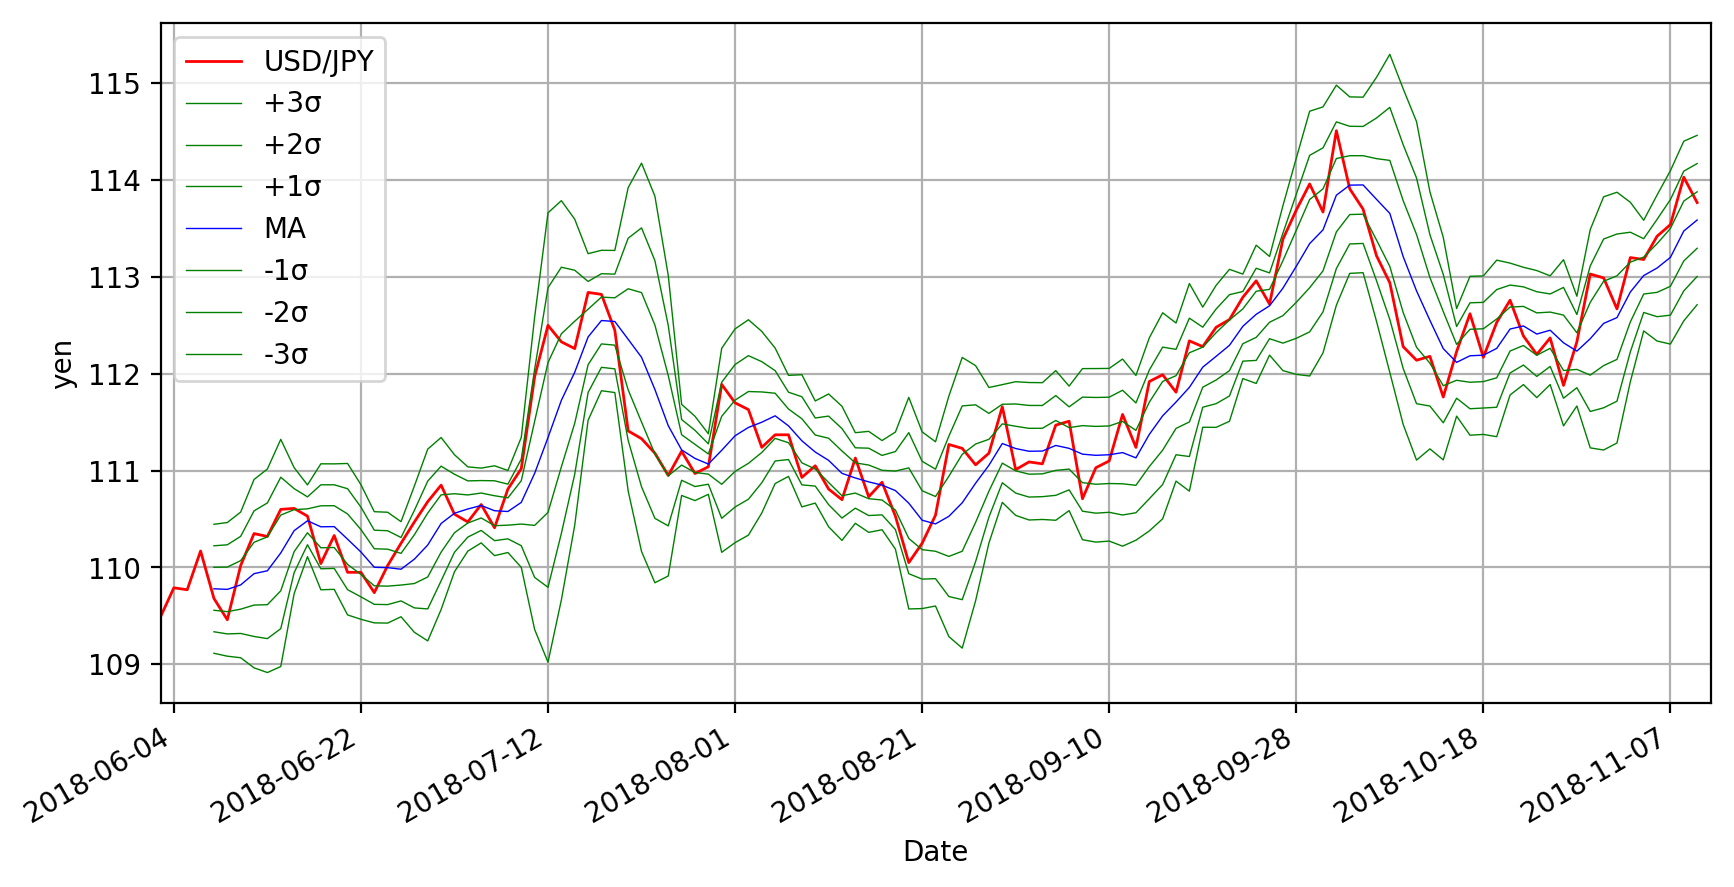

In [31]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = plt.subplot()

# グラフのタイトルとラベル
#plt.title('USD/JPY')
plt.xlabel('Date')
plt.ylabel('yen')

"""
# numpy型行列を生成
ohlc = np.vstack((range(len(df)), df.values.T)).T # vstackは垂直結合、range関数によってdfの長さのリストが生成され、Tは転置行列を返す。
# ローソク足グラフの生成
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b') # ローソク足の設定（widthは足の幅）
"""

#終値を表示
ax.plot(range(len(df_close)), df_close, color='red', linewidth=1, label='USD/JPY')



# ボリンジャーバンド
ax.plot(range(len(df_close)), upper3, color='green', linewidth = 0.5, label='+3σ')
ax.plot(range(len(df_close)), upper2, color='green', linewidth = 0.5, label='+2σ')
ax.plot(range(len(df_close)), upper1, color='green', linewidth = 0.5, label='+1σ')
ax.plot(range(len(df_close)), middle, color='blue', linewidth = 0.5, label='MA')
ax.plot(range(len(df_close)), lower1, color='green', linewidth = 0.5, label='-1σ')
ax.plot(range(len(df_close)), lower2, color='green', linewidth = 0.5, label='-2σ')
ax.plot(range(len(df_close)), lower3, color='green', linewidth = 0.5, label='-3σ')

xtick0 = (5 - df_close.index[0].weekday())%5 # 最初の日を特定
period = 14 #メモリの間隔
# 第１引数が目盛りの指定、第２引数がラベルの指定
plt.xticks(range(xtick0, len(df_close), period), [x.strftime('%Y-%m-%d') for x in df_close.index][xtick0::period])

ax.grid(True) # グリッドをつける
ax.set_xlim(0, len(df_close)) # X軸での描画の上限を決める
ax.legend() # ラベル名の表示
fig.autofmt_xdate() # 日付の表示がいい感じになる

## RSI

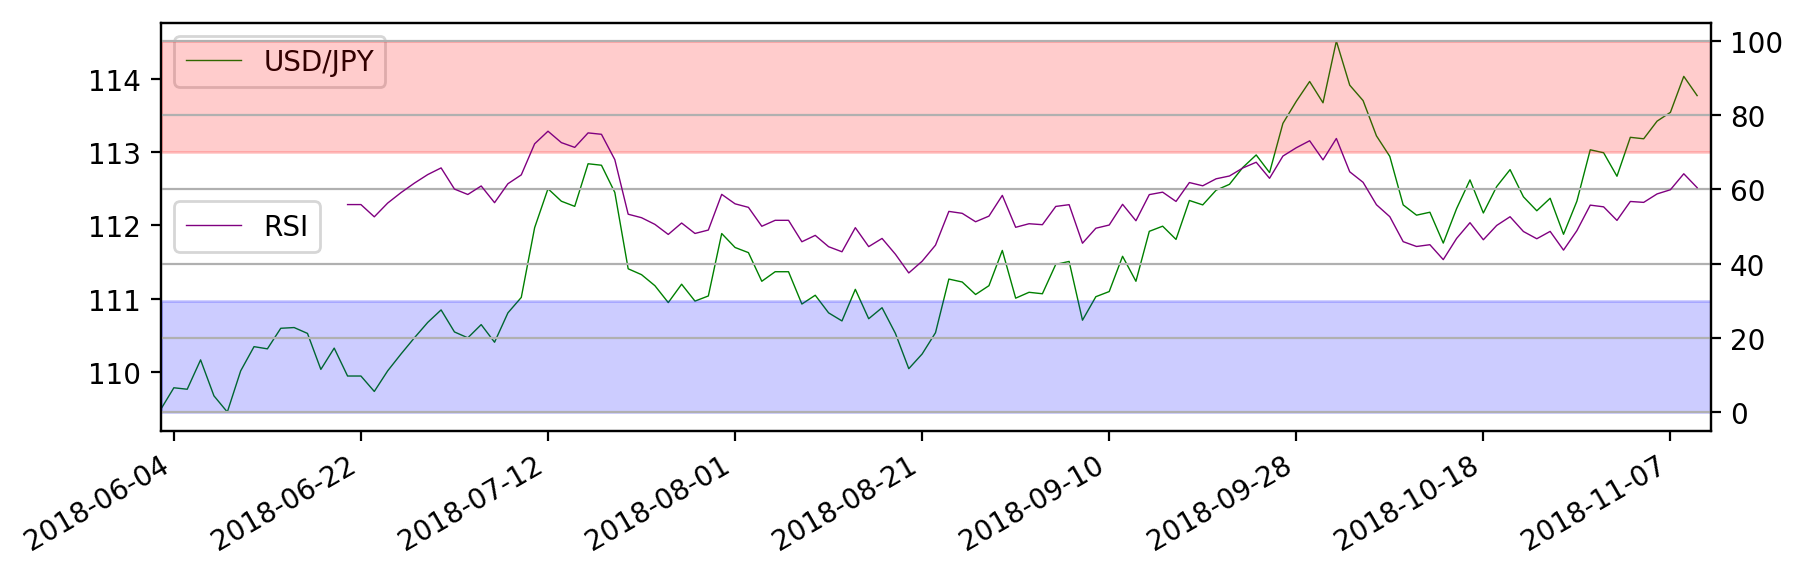

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 3), dpi=200)
#ax1 = plt.subplot()
ax2 = ax1.twinx()

#終値を表示
ax1.plot(range(len(df_close)), df_close, color='green', linewidth=0.5, label='USD/JPY')

#RSIを表示
ax2.plot(range(len(df_close)), rsi14, color='purple', linewidth=0.5, label='RSI')

# メモリの
xtick0 = (5 - df_close.index[0].weekday())%5 # 最初の日を特定
period = 14 #メモリの間隔
# 第１引数が目盛りの指定、第２引数がラベルの指定
plt.xticks(range(xtick0, len(df_close), period), [x.strftime('%Y-%m-%d') for x in df_close.index][xtick0::period])

# 30%以下と70%以上を塗りつぶす
plt.fill([0, 0, len(df_close), len(df_close)], [70, 100, 100, 70], color="red",alpha=0.2)
plt.fill([0, 0, len(df_close), len(df_close)], [0, 30, 30, 0], color="blue",alpha=0.2)

plt.grid(True) # グリッド
ax1.set_xlim(0, len(df_close)) # X軸での描画の上限を決める
ax1.legend() # ラベル名の表示
ax2.legend() # ラベル名の表示
fig.autofmt_xdate() # 日付の表示がいい感じになる